In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


In [3]:
# creat file path to csv
data_df= pd.read_csv("../data/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
data_df.head()

#delete unecessary columns
covid_deaths_df= data_df[['Data As Of','State','Sex',
                                     'Age Group','COVID-19 Deaths','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths',
                                     'Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths']]
covid_deaths_df.head()        


,Data As Of,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,09/27/2023,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0
1,09/27/2023,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0
2,09/27/2023,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0
3,09/27/2023,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0
4,09/27/2023,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0


In [4]:
covid_deaths_df.dtypes

Data As Of                                   object
State                                        object
Sex                                          object
Age Group                                    object
COVID-19 Deaths                             float64
Total Deaths                                float64
Pneumonia Deaths                            float64
Pneumonia and COVID-19 Deaths               float64
Influenza Deaths                            float64
Pneumonia, Influenza, or COVID-19 Deaths    float64
dtype: object

In [5]:
#removing male/female
all_sexes_covid_deaths_df= covid_deaths_df.loc[(covid_deaths_df['Sex']=='All Sexes')]
all_sexes_covid_deaths_df

,Data As Of,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,09/27/2023,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0
1,09/27/2023,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0
2,09/27/2023,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0
3,09/27/2023,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0
4,09/27/2023,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0
...,...,...,...,...,...,...,...,...,...,...
137661,09/27/2023,Puerto Rico,All Sexes,50-64 years,NaN,203.0,35.0,NaN,0.0,36.0
137662,09/27/2023,Puerto Rico,All Sexes,55-64 years,NaN,169.0,29.0,NaN,0.0,30.0
137663,09/27/2023,Puerto Rico,All Sexes,65-74 years,NaN,244.0,32.0,NaN,NaN,33.0
137664,09/27/2023,Puerto Rico,All Sexes,75-84 years,15.0,443.0,85.0,NaN,NaN,93.0


In [6]:
all_sexes_covid_deaths_df.to_csv("CLEAN_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv", index = False)

In [7]:
clean_data_df= pd.read_csv ('../data/CLEAN_Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')
clean_data_df.head()

,Data As Of,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,09/27/2023,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0
1,09/27/2023,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0
2,09/27/2023,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0
3,09/27/2023,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0
4,09/27/2023,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0


In [31]:
#confirming which states are under column state in order to filter out any unwanted "states"
unique_values = clean_data_df['State'].unique()
unique_values

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'New York City', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'Puerto Rico'], dtype=object)

In [44]:
#filter out unwanted data in the States column that we are not using for analysis
filtered_by_state= clean_data_df.loc[(clean_data_df ['State']!='Puerto Rico') & (clean_data_df['State']!='United States')
                                      & (clean_data_df['State']!= 'District of Columbia')] 
#dropping rows with null values in columns we are using for analysis
drop_null_df= filtered_by_state.dropna(subset=['COVID-19 Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths',
                                           'Pneumonia, Influenza, or COVID-19 Deaths','Total Deaths'])
drop_null_df
                                                        

,Data As Of,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
17,09/27/2023,Alabama,All Sexes,All Ages,21520.0,231602.0,17619.0,7411.0,356.0,32038.0
25,09/27/2023,Alabama,All Sexes,30-39 years,416.0,6827.0,319.0,147.0,13.0,599.0
26,09/27/2023,Alabama,All Sexes,35-44 years,670.0,8639.0,468.0,231.0,16.0,921.0
27,09/27/2023,Alabama,All Sexes,40-49 years,1053.0,11224.0,748.0,359.0,14.0,1455.0
28,09/27/2023,Alabama,All Sexes,45-54 years,1628.0,15413.0,1114.0,557.0,23.0,2206.0
...,...,...,...,...,...,...,...,...,...,...
45110,09/27/2023,Wyoming,All Sexes,35-44 years,0.0,16.0,0.0,0.0,0.0,0.0
45111,09/27/2023,Wyoming,All Sexes,40-49 years,0.0,20.0,0.0,0.0,0.0,0.0
45112,09/27/2023,Wyoming,All Sexes,45-54 years,0.0,22.0,0.0,0.0,0.0,0.0
45121,09/27/2023,Wyoming,All Sexes,1-4 years,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#confirming null values have been dropped
columns_with_null = drop_null_df.isnull().any()
columns_with_null.head() 


Data As Of         False
State              False
Sex                False
Age Group          False
COVID-19 Deaths    False
dtype: bool

Text(0.5, 1.0, 'COVID-19 Deaths per State')

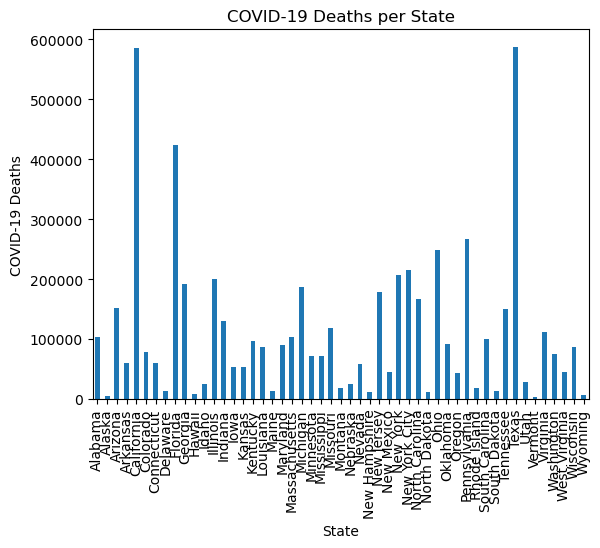

In [55]:
#making bar graph using groupby function
grouped_by_df = drop_null_df.groupby(['State'])['COVID-19 Deaths'].sum().reset_index()

#plot bar graph
grouped_by_df.plot(kind='bar', x='State', y='COVID-19 Deaths', legend=False)

# Add labels and title
plt.xlabel('State')
plt.ylabel('COVID-19 Deaths')
plt.title('COVID-19 Deaths per State')


KeyError: "None of [Index(['Alabama'], dtype='object')] are in the [columns]"

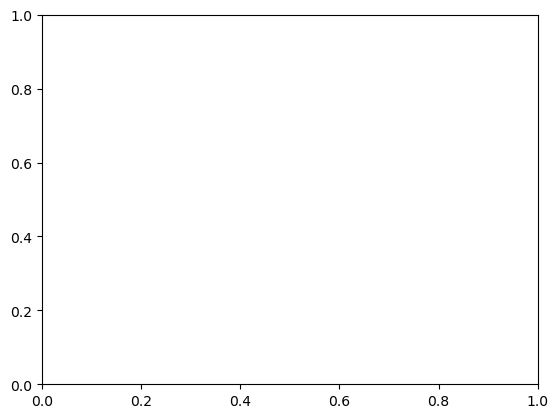

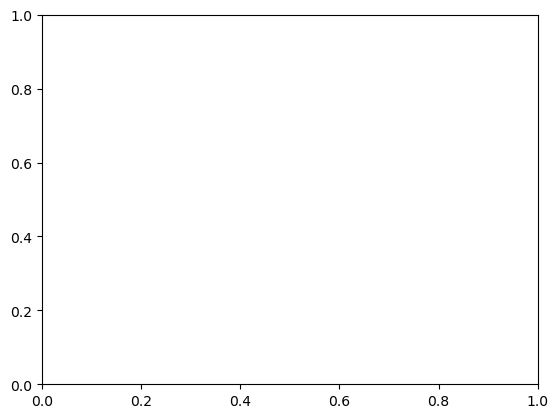

In [90]:
#making bar graph using groupby function
#grouped_by_df = drop_null_df.groupby(['State'])['COVID-19 Deaths'].sum().reset_index()
condition= lambda x: x['COVID-19 Deaths'].sum()
filtered_groups = drop_null_df.groupby('State').filter(lambda x: condition(x).all())
fig, ax = plt.subplots()

for name, filtered_groups in drop_null_df.groupby('State'):
    filtered_groups.plot.scatter(x=filtered_groups['State'], y=filtered_groups['COVID-19 Deaths'], label=name,)

# Label the x-axis and y-axis
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Add a title to the plot
plt.title('Scatter Plot Example')

Text(0.5, 1.0, 'Pnuemonia Deaths per State')

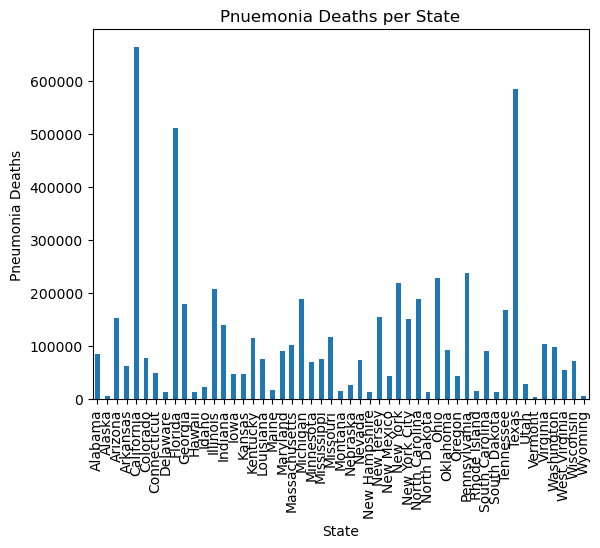

In [56]:
#making bar graph using groupby function
grouped_by_df = drop_null_df.groupby(['State'])['Pneumonia Deaths'].sum().reset_index()

#plot bar graph
grouped_by_df.plot(kind='bar', x='State', y='Pneumonia Deaths', legend=False)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Pneumonia Deaths')
plt.title('Pnuemonia Deaths per State')
